# Introduction

Supervised learning problems can be further grouped into

- Regression problems and
- Classification problems

In classification, learning algorithms takes the input data and map the output to a discrete output like True or False.

In regression, learning algorithms maps the input data to continuous output like weight, cost, etc.

In this project I will apply regression techniques of supervised learning to predict the medical insurance costs.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

## Reading the data

In [4]:
data= pd.read_csv(r"C:\Users\Abhijeet\ML Daily work\healthinsurance_charges_prediction\insurance.csv")

In [5]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Data Exploration

Dataset consists of 1338 records. Each record contains the below data for specific person.

- age – Age of the person
- sex – Sex of the person
- bmi – Body Mass Index(BMI) of the person
- children – Number of children for the person
- smoker – Smoking status of the person
- region – Region of the person in US
- charges – Medical Insurance costs per year for the person

### Checking shape of the data

In [6]:
print('dataframe shape:', data.shape)

dataframe shape: (1338, 7)


### Checking summery of the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Checking columns
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Checking Duplicates

In [8]:
data.duplicated().sum()

1

In [9]:
# removing Duplicate row
duplicate = data[data.duplicated().values]
print(duplicate)

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [10]:
data.drop([581], axis=0, inplace = True)

In [11]:
# after removing duplicate row reseting Index

data.reset_index(inplace = True, drop =True)

### Checking Null values

In [12]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Analysis

In [13]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'under-weight'
    elif bmi >= 18.5 and bmi <= 24.9:
        return 'normal-weight'
    elif bmi >= 24 and bmi <= 29.9:
        return 'over-weight'
    elif bmi > 30.0:
        return "obese"
    
def age_category(age):
    age_dict = {
        0: '0-9',
        1: '10-19',
        2: '20-29',
        3: '30-39',
        4: '40-49',
        5: '50-59',
        6: '60-69',
        7: '70-79',
        8: '80-89',
        9: '90-99',
        10: '100-200'
    }
    return age_dict[age//10]

data['cbmi'] = data['bmi'].apply(lambda x: "none")
data['cage'] = data['age'].apply(lambda x: "none")
for idx, row in data.iterrows():
    data.at[idx, 'cage'] = age_category(row['age'])
    data.at[idx, 'cbmi'] = bmi_category(row['bmi'])

by_age = data.groupby(by='cage').size()
print (by_age)
print ('-'*80)

by_bmi = data.groupby(by='cbmi').size()
print (by_bmi)
print ('-'*80)

cage
10-19    136
20-29    280
30-39    257
40-49    279
50-59    271
60-69    114
dtype: int64
--------------------------------------------------------------------------------
cbmi
normal-weight    222
obese            704
over-weight      380
under-weight      20
dtype: int64
--------------------------------------------------------------------------------


To understand correlation between the input or the independent variables, I classified the ages and BMI into specific categories. The above analysis shows the stats like number of male and female, smokers and non-smokers, etc. from the input data.
Taking the BMI ranges from Medline Plus, I categorized the input samples into **'below-weight'**, **'normal-weight'**, **'over-weight'** and **'obese'**

From the above data we can observe below

- Input data contains an even distribution of male and female samples
- Majority of them are non-smokers with 1064 samples
- Majority of the samples are in age groups 20-29 and 40- 49 with the numbers 280 and 279 respectively.
- A major sample of input data contains persons with no children with 574.
- The data is evenly distributed across 4 regions with the region of southeast having slightly more samples.
- Majority the sample fall under the category of obese

Data distribution analysys


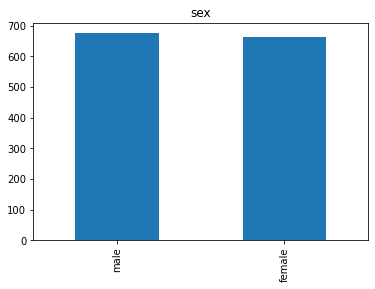

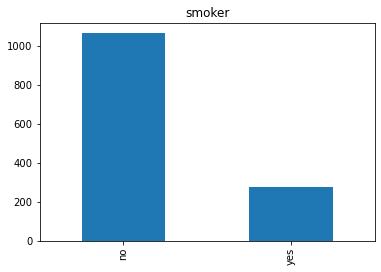

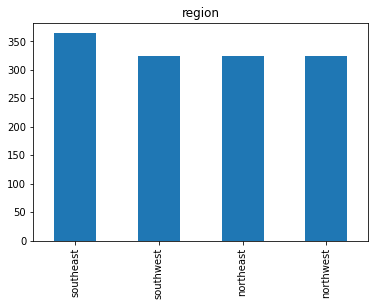

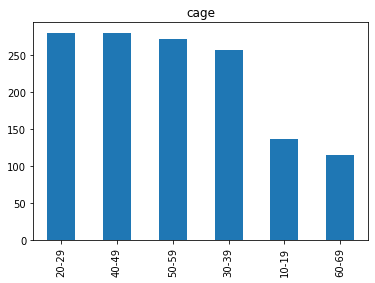

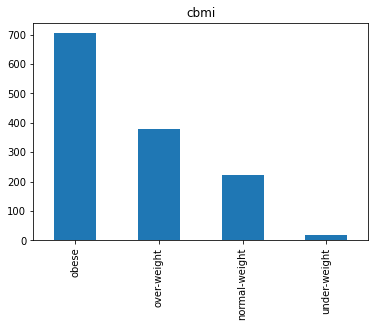

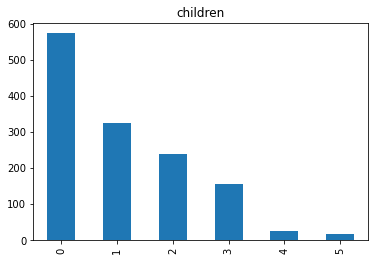

In [14]:


variables = ['sex','smoker','region','cage','cbmi','children']

# data distribution analysys
print('Data distribution analysys')
for v in variables:
    data = data.sort_values(by=[v])
    data[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()

From the above bar graphs, we can deduce the below facts.

- Insurance costs are higher among male population
- Insurance costs are highest among the population of age groups 60-69.
- Insurance costs increases among the smokers
- Insurance costs increases among the obese population
- Insurance costs are higher among the population in southwest region
- Surprisingly, insurance costs are higher among the individuals with 2 or 3 children rather than with individuals with 4 or 5 children.

<AxesSubplot:xlabel='sex', ylabel='charges'>

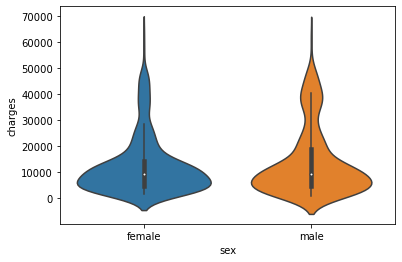

In [15]:
sns.violinplot(x='sex', y='charges',data=data)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

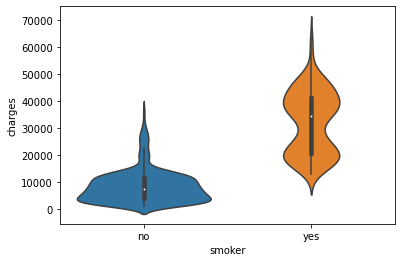

In [16]:
sns.violinplot(x='smoker', y='charges',data=data)

<AxesSubplot:xlabel='region', ylabel='charges'>

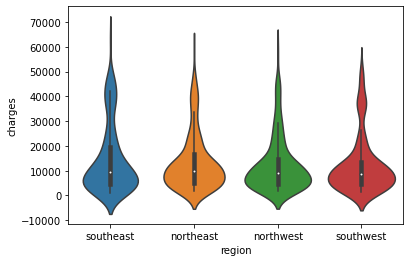

In [17]:
sns.violinplot(x='region', y='charges',data=data)

<AxesSubplot:xlabel='sex', ylabel='charges'>

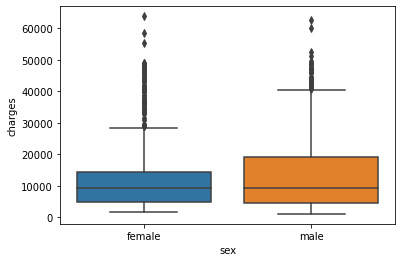

In [18]:
sns.boxplot(x='sex', y='charges',data=data)

<AxesSubplot:xlabel='cage', ylabel='charges'>

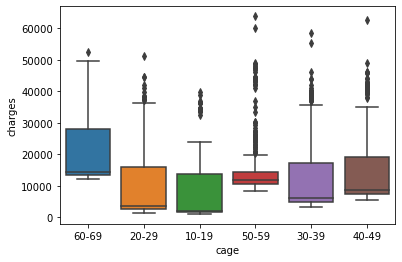

In [19]:
sns.boxplot(x='cage', y='charges',data=data)

<AxesSubplot:xlabel='cbmi', ylabel='charges'>

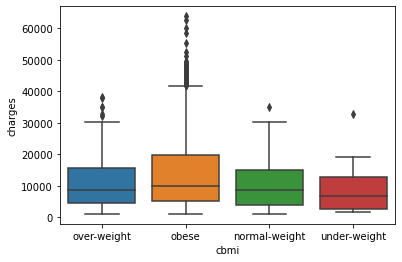

In [20]:
sns.boxplot(x='cbmi', y='charges',data=data)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

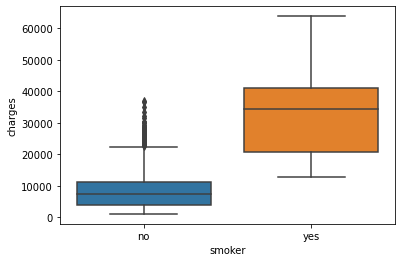

In [21]:
sns.boxplot(x='smoker', y='charges',data=data)

<AxesSubplot:xlabel='children', ylabel='charges'>

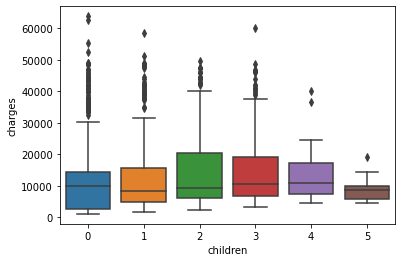

In [22]:
sns.boxplot(x='children', y='charges',data=data)

<AxesSubplot:xlabel='region', ylabel='charges'>

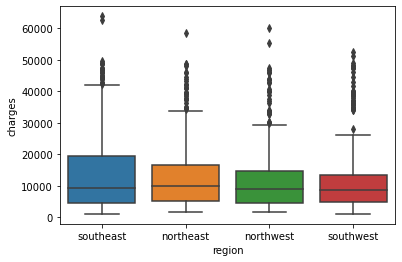

In [23]:
sns.boxplot(x='region', y='charges',data=data)

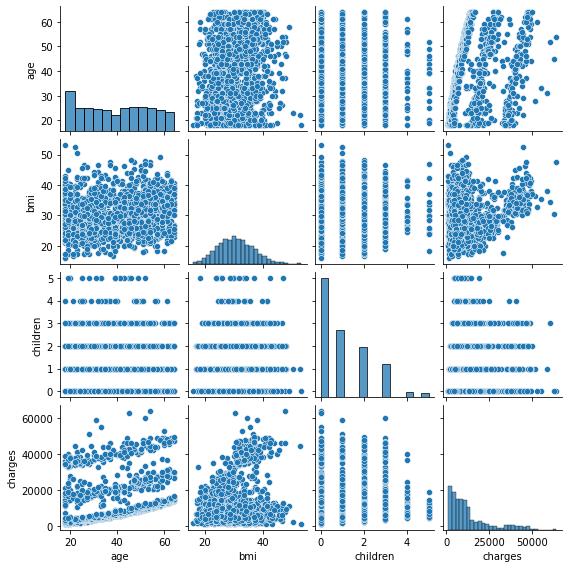

In [24]:
sns.pairplot(data, size=2)

## Checking Correlation

<AxesSubplot:>

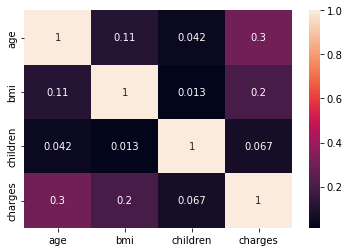

In [25]:
sns.heatmap(data.corr(),annot=True)

- Here we can see children column is in dark color that means it is not correlated so we are drop unnecessary data drom dataframe 

In [26]:
data.drop('children',axis=1)

,age,sex,bmi,smoker,region,charges,cbmi,cage
788,62,female,29.92,no,southeast,13457.96080,None,60-69
192,25,male,25.74,no,southeast,2137.65360,over-weight,20-29
647,18,male,28.50,no,northeast,1712.22700,over-weight,10-19
778,53,male,28.88,no,northwest,9869.81020,over-weight,50-59
543,54,female,47.41,yes,southeast,63770.42801,obese,50-59
...,...,...,...,...,...,...,...,...
1084,39,female,18.30,yes,southwest,19023.26000,under-weight,30-39
931,46,male,25.80,no,southwest,10096.97000,over-weight,40-49
413,25,male,23.90,no,southwest,5080.09600,normal-weight,20-29
71,31,male,28.50,no,northeast,6799.45800,over-weight,30-39


## Checking Skewness

In [28]:
# importing library
from scipy.stats import skew
skew(data['age'])

0.054719294607049655

In [29]:
numcol = data.select_dtypes(["int64","float64"]).columns

age
0.054719294607049655


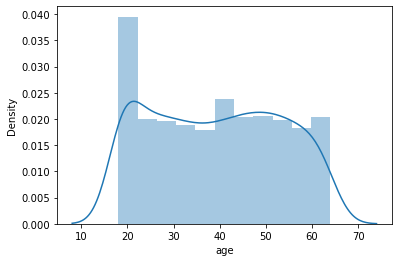

bmi
0.2835955670169305


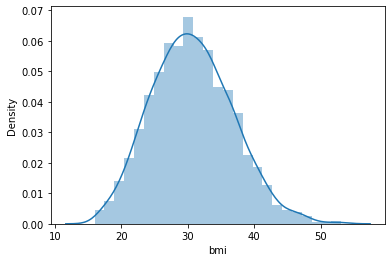

children
0.9363686100859416


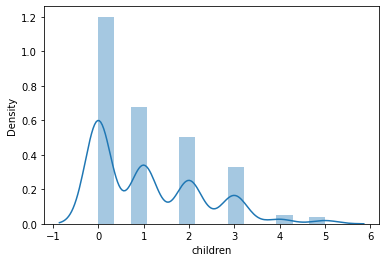

charges
1.5136902413349014


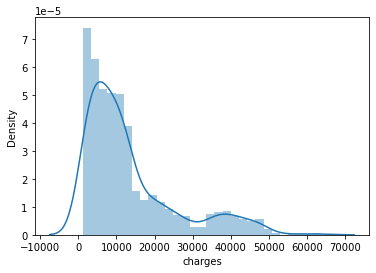

In [30]:
for col in numcol:
    plt.figure()
    print(col)
    print(skew(data[col]))
    sns.distplot(data[col])
    plt.show()

# Data Encoding
## From Lebel Encoding we are converting categorical columns to numerical columns

In [38]:
cat_cols = list(data.select_dtypes('object').columns)
cat_cols

['sex', 'smoker', 'region', 'cbmi', 'cage']

In [39]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    le = LabelEncoder()
    data[col]  = le.fit_transform(data[col])

In [40]:
data

,age,sex,bmi,children,smoker,region,charges,cbmi,cage
788,62,0,29.92,0,0,2,13457.96080,4,5
192,25,1,25.74,0,0,2,2137.65360,2,1
647,18,1,28.50,0,0,0,1712.22700,2,0
778,53,1,28.88,0,0,1,9869.81020,2,4
543,54,0,47.41,0,1,2,63770.42801,1,4
...,...,...,...,...,...,...,...,...,...
1084,39,0,18.30,5,1,3,19023.26000,3,2
931,46,1,25.80,5,0,3,10096.97000,2,3
413,25,1,23.90,5,0,3,5080.09600,0,1
71,31,1,28.50,5,0,0,6799.45800,2,2


# Extracting dependent and independent Variables:

In [78]:
X = data.drop(['cage','cbmi','charges'], axis=1)
y = data["charges"]


In [79]:
X

,age,sex,bmi,children,smoker,region
788,62,0,29.92,0,0,2
192,25,1,25.74,0,0,2
647,18,1,28.50,0,0,0
778,53,1,28.88,0,0,1
543,54,0,47.41,0,1,2
...,...,...,...,...,...,...
1084,39,0,18.30,5,1,3
931,46,1,25.80,5,0,3
413,25,1,23.90,5,0,3
71,31,1,28.50,5,0,0


In [80]:
y

788     13457.96080
192      2137.65360
647      1712.22700
778      9869.81020
543     63770.42801
           ...     
1084    19023.26000
931     10096.97000
413      5080.09600
71       6799.45800
1129     8582.30230
Name: charges, Length: 1337, dtype: float64

# Splitting the dataset into training and test set.

In [81]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

- Splitting the data set into training and testing subsets helps to assess the performance of the model over an independent data set. Typlically, we train the model using training data subset and then evaluate the model's performance using the testing data subset, which is independent of the training data subset.



## Data Scaling 

In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting MLR model to the Training set

In [83]:
from sklearn.linear_model import LinearRegression

lregressor = LinearRegression()
lregressor.fit(X_train, y_train)
y_pred = lregressor.predict(X_test)

In [84]:
y_pred

array([ 9.15390509e+03,  3.32857272e+04,  3.30886153e+03,  1.24626100e+04,
        7.06324993e+03,  1.61781773e+03,  3.27987962e+03,  4.85377964e+03,
        9.28210175e+03,  3.30794569e+04,  5.79190727e+03,  3.64118703e+04,
        1.10654767e+04,  3.55115444e+04,  5.61914029e+03,  3.00839143e+04,
        5.00731238e+03,  1.36599233e+04,  1.39695459e+04,  1.26651114e+04,
        8.85692709e+03,  9.58921339e+03,  8.20041104e+03,  6.25323444e+03,
        1.16167671e+04,  1.63059013e+04,  4.54379553e+03,  4.04832814e+04,
        1.09950571e+04,  3.49564351e+04,  9.25729072e+03,  6.55525895e+03,
        7.52444381e+03,  1.79276330e+03, -6.54379002e+02, -3.74738294e+02,
        8.31892647e+02,  1.60989063e+04,  9.67257342e+03,  2.29570216e+04,
        2.77624445e+03,  9.19816731e+03,  9.91106077e+03,  7.14284875e+03,
        4.93315706e+03,  1.03810155e+04,  4.18299187e+03,  1.00064004e+04,
        2.81812924e+04,  3.86549333e+04,  1.47208813e+04,  1.02227881e+04,
        1.41882716e+04,  

In [85]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
r2  = r2_score(y_test, y_pred)

print(f"MAE : {mae}\nMSE : {mse}\nRMSE : {rmse}\nAccuracy : {r2}")

MAE : 4133.361259362049
MSE : 38377459.91510935
RMSE : 6194.9543916892035
Accuracy : 0.7485228276585276


In [86]:
train = lregressor.score(X_train, y_train)
test  = lregressor.score(X_test,y_test)
print(f"Training Accuracy : {train}")
print(f"Testing Accuracy : {test}")

Training Accuracy : 0.7504342042987899
Testing Accuracy : 0.7485228276585276


<AxesSubplot:xlabel='charges', ylabel='Density'>

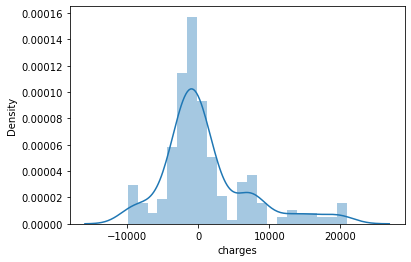

In [87]:
sns.distplot(y_test - y_pred)

- As seen from the above results, selected MLR model seems to be predicting the costs accurately because we are getting same almost same accuracy for both set

# Polynominal Regression Model

In [88]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(X,y,test_size = 0.3,random_state=44)

In [89]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

In [90]:
X_poly = poly.fit_transform(x_train1)

In [91]:
L1 = LinearRegression()
L1.fit(X_poly,y_train1)

LinearRegression()

In [92]:
x_test_poly = poly.fit_transform(x_test1)

In [95]:
Y_pred=L1.predict(x_test_poly)
Y_pred

array([-3.32187500e+01,  1.00634375e+04,  1.48324688e+04,  1.19159688e+04,
        2.38609375e+03,  6.39278125e+03,  1.26407188e+04,  1.07618125e+04,
        5.43234375e+03,  9.08578125e+03,  1.36714375e+04,  3.25627812e+04,
        1.32934688e+04,  1.05297500e+04,  6.13575000e+03,  5.20875000e+03,
        1.31496562e+04,  1.87633125e+04,  5.18711250e+04,  1.08327500e+04,
        1.40795938e+04,  1.17154375e+04,  5.46475000e+03,  1.21864688e+04,
        1.10722812e+04,  3.24137812e+04,  4.65166250e+04,  5.25052812e+04,
        1.18172500e+04,  4.33675000e+03,  1.92798438e+04,  5.41656250e+03,
        4.90244688e+04,  1.94651250e+04,  4.65006250e+03,  1.42889688e+04,
        1.05756562e+04,  7.44553125e+03,  1.02822812e+04,  5.37428125e+03,
        8.67550000e+03,  6.92150000e+03,  7.18731250e+03,  5.75359375e+03,
        4.41112500e+03,  1.26607188e+04,  1.31490625e+04,  8.80915625e+03,
        2.36039688e+04,  3.93266875e+04, -2.64875000e+02,  3.70909062e+04,
        2.76143750e+04,  

In [96]:
print("R2 score : ",r2_score(y_test1,Y_pred))
print("MSE  : ",np.sqrt(mean_squared_error(y_test1,Y_pred)))

R2 score :  0.8537267507697175
MSE  :  4867.32068126485


# Random Forest Regressor

In [102]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [104]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
model_RF = RF.fit(xtrain1,ytrain1)
ypred_RF = RF.predict(xtest1)

R2=r2_score(ytest1,ypred_rf)
R2

0.8702123658090473

In [105]:
ypred_RF

array([16053.5383184 , 12465.9095217 ,  5957.909678  , 13948.39281   ,
        5910.0294001 , 14913.9050346 ,  5373.29162115, 11315.3612927 ,
       17308.2357385 ,  8012.0504874 ,  4339.654061  , 48486.2062977 ,
        4874.8392795 , 10990.1663182 , 19961.5487967 , 23913.072636  ,
        6675.5735456 , 11872.3045921 ,  7344.4581626 ,  1263.5048155 ,
        8358.5431685 , 13631.4995876 , 19296.3944254 ,  4860.180297  ,
       11615.1909675 , 42720.4863715 , 39388.253727  ,  5264.1098806 ,
       11602.849262  ,  8733.7483439 ,  1828.5724256 ,  6784.794296  ,
       45886.290502  ,  3201.13294392, 10993.7968792 , 39484.1691909 ,
       13235.9137187 , 12112.930203  , 38551.8252774 , 14631.6696072 ,
       36202.9298727 , 20799.8983978 ,  7348.9300204 , 13223.773244  ,
       11419.6502353 , 22340.8576298 , 14261.051627  , 22338.4905585 ,
        9849.3736629 , 21712.695085  ,  7219.4390334 , 13704.583208  ,
        1826.265424  ,  4508.3027914 ,  3110.3750804 , 10180.3771259 ,
      